# Πληροφορίες Ομάδας
**Ομάδα 33**

- Βασιλείου Γεώργιος - ΑΜ 03116062
- Στεντούμης Σπυρίδων-Παρασκευάς  - ΑΜ 03116747
- (Σχετικά με το τρίτο άτομο έχει υπάρξει επικοινωνία με τον κ. Σιόλα στο Discord)

#Εισαγωγή Απαραίτητων Βιβλιοθηκών

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Επιλογή κατάλληλων κλάσεων

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

# REPLACE WITH YOUR TEAM NUMBER
team_seed = 33

def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

def classes(number=20):
  cifar100_classes_url = select_classes_number(number)
  team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
  CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]
  our_index = team_classes.iloc[team_seed,:].values.tolist()
  our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
  return our_index, our_classes

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number()
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)

## Δημιουργία και φιλτράρισμα TFRecords

Λήψη δεδομένων ως TFRecords και φιλτράρισμα κλάσεων. Μπορούμε να δούμε ότι μετά το φιλτράρισμα το dataset μας περιλαμβάνει μόνο δεδομένα των οποιών το label είναι στη λίστα με τα δικάς μας label.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

def map_function(feature, label):
  feature = feature/255
  return feature, label

BATCH_SIZE = 64
ds_train, ds_test, ds_val = tfds.load('cifar100', split=['train[:85%]','test','train[85%:]'], as_supervised=True)
our_index, our_classes = classes(20)

#Built predicate base on:
#https://stackoverflow.com/questions/55731774/filter-dataset-to-get-just-images-from-specific-class
def predicate(feature, label, allowed_labels=tf.constant(our_index)):
    isallowed = tf.equal(tf.cast(allowed_labels, tf.float32), tf.cast(label, tf.float32))
    reduced = tf.reduce_sum(tf.cast(isallowed, tf.float32))
    return tf.greater(reduced, tf.constant(0.))

ds_20_train = ds_train.filter(predicate).map(map_function).shuffle(3000).batch(BATCH_SIZE)
ds_20_test = ds_test.filter(predicate).map(map_function).shuffle(5000).batch(BATCH_SIZE)
ds_20_val = ds_val.filter(predicate).map(map_function).shuffle(5000).batch(BATCH_SIZE)

our_index, our_classes = classes(80)

#Redefining to change our_index default values
def predicate(feature, label, allowed_labels=tf.constant(our_index)):
    isallowed = tf.equal(tf.cast(allowed_labels, tf.float32), tf.cast(label, tf.float32))
    reduced = tf.reduce_sum(tf.cast(isallowed, tf.float32))
    return tf.greater(reduced, tf.constant(0.))

ds_80_train = ds_train.filter(predicate).map(map_function).shuffle(3000).batch(BATCH_SIZE)
ds_80_test = ds_test.filter(predicate).map(map_function).shuffle(5000).batch(BATCH_SIZE)
ds_80_val = ds_val.filter(predicate).map(map_function).shuffle(5000).batch(BATCH_SIZE)

print("Our labels are: ", our_index)
print("Number of Train Images ~: ", len(list(ds_80_train))*BATCH_SIZE)
print("Number of Test Images ~: ", len(list(ds_80_test))*BATCH_SIZE)
print("Number of Validation Images ~: ", len(list(ds_80_val))*BATCH_SIZE)

Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete10BZNM/cifar100-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete10BZNM/cifar100-test.tfrecord


Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.
Our labels are:  [0, 2, 3, 5, 7, 8, 9, 10, 11, 13, 15, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 97, 98]
Number of Train Images ~:  8512
Number of Test Images ~:  2048
Number of Validation Images ~:  1536


## TensorBoard και Συναρτήσεις Αξιολόγησης

In [ ]:
%load_ext tensorboard
import time
!rm -rf ./logs/

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='Training')
	plt.plot(history.history['val_loss'], color='orange', label='Validation')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['sparse_categorical_accuracy'], color='blue', label='Training')
	plt.plot(history.history['val_sparse_categorical_accuracy'], color='orange', label='Validation')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, train_ds, test_ds,evaluation_steps):
  print(" --- Evaluation Metrics--- ")
  print("Train set Evaluation")
  loss0,accuracy0 = model.evaluate(train_ds, steps = evaluation_steps, verbose = 0)
  print("Loss on Train Data: {:.3f}".format(loss0))
  print("Accuracy on Train Data: {:.3f}".format(accuracy0))
  print('\nTest set Evaluation')
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps, verbose = 0)
  print("Loss on Test Data: {:.3f}".format(loss0))
  print("Accuracy on Test Data: {:.3f}".format(accuracy0))

def model_report(model, history,train_ds, test_ds, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model,train_ds,test_ds, evaluation_steps)

# From-scratch μοντέλα

Ξεκινάμε τον πειραματισμό με απλά From Scratch μοντέλα, τόσο απλών συνδεδεμένων δικύων και συνελικτικών. Δεν αναμένουμε υψηλή απόδοση από την εκπαίδευση των δικτύων αυτών, άλλωστε είναι πολύ απλά για να συγκλίνουν ικανοποιητικά για πρόβλημα ταξινόμησης εικόνων. Ελπίζουμε όμως να συγκρίνουμε την απόδοση ορισμένων υπερπαραμέτρων, ώστε να ενημερωθούν οι επόμενες επιλογές. Εξετάζουμε την εισαγωγή απλών βελτιστοποιήσεων όπως early stopping και dropout.

##Fully Connected Δίκτα

Εξετάζουμε την λειτουργία δυο πλήρως συνδεδεμένων δικτύων διαφορετικών μεγεθών. Αντιλαμβανόμαστε από την χαμηλή επίδοση του πρώτου δικτύου, στα δεδομένα εκπαίδευσης και αξιολόγησης, η αναπαράσταση των εικόνων δεν επαρκεί για την αναγνώριση των κλάσσεων. Θα έπρεπε να προβούμε σε σημαντική προεπεξεργασία δεδομένων και σε συστήματικό feature extraction ώστε να μπορέσει να βελτιωθεί η απόδοση του. 


***** MODEL SUMMARY *****
Model: "FC_3072x256x100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
Total params: 812,388
Trainable params: 812,388
Non-trainable params: 0
_________________________________________________________________
***** MODEL REPORT *****


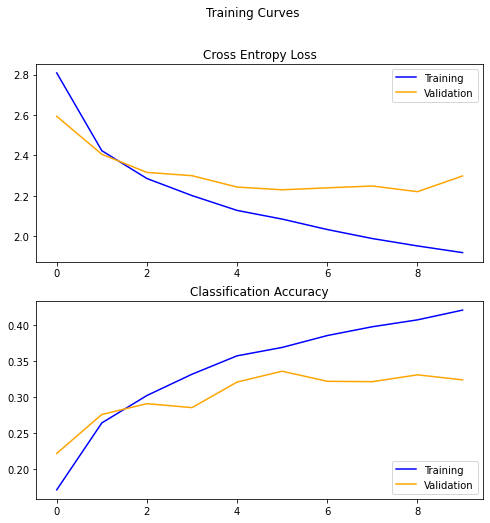

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.999
Accuracy on Train Data: 0.370

Test set Evaluation
Loss on Test Data: 2.254
Accuracy on Test Data: 0.336
 --- Trained at: 25.21745228767395 secs --- 


In [ ]:
fcn1 = tf.keras.Sequential(name = "FC_3072x256x100")
fcn1.add(tf.keras.layers.Flatten())
fcn1.add(tf.keras.layers.Dense(256, activation='relu'))
fcn1.add(tf.keras.layers.Dense(100, activation='softmax'))

start_time = time.time()
fcn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
fcn1_train = fcn1.fit(x=ds_80_train, validation_data=ds_80_test, epochs=10, verbose=0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
fcn1.summary()
print("***** MODEL REPORT *****")
model_report(fcn1,fcn1_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Τα επόμενα δίκτυα που εξετάζουμε βασίζονται σε ένα μεγαλύτερο δίκτυο FC layers. Βλέπουμε ότι μετά την εκπαίδευση, το δίκτυο έχει πολύ καλή ακρίβεια στα δεδομένα εκπαίδευσης, αλλά σημαντικά μειωμένη ικανότητα στα test data. Αυτό δείχνει έλλειψη γενίκευσης, και άρα υποδεικνύει overfitting του δικτύου.

***** MODEL SUMMARY *****
Model: "FC_3072x4096x2048x1024x512x100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              12587008  
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               51300     
Total params: 23,651,940
Trainable params: 23,651,940
Non-trainable params: 

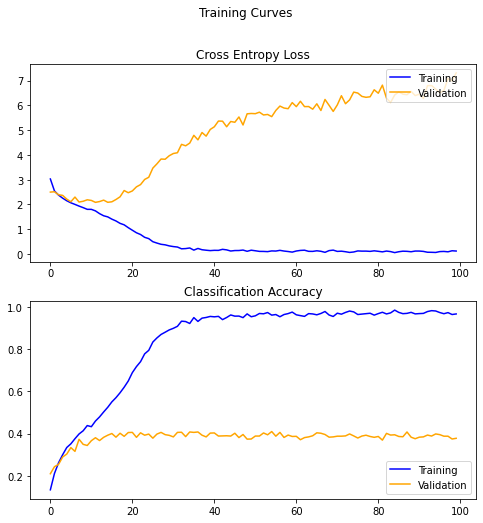

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.241
Accuracy on Train Data: 0.928

Test set Evaluation
Loss on Test Data: 6.782
Accuracy on Test Data: 0.389
 --- Trained at: 349.8580701351166 secs --- 


In [ ]:
fcn2 = tf.keras.Sequential(name = "FC_3072x4096x2048x1024x512x100")
fcn2.add(tf.keras.layers.Flatten())
fcn2.add(tf.keras.layers.Dense(4096, activation='relu'))
fcn2.add(tf.keras.layers.Dense(2048, activation='relu'))
fcn2.add(tf.keras.layers.Dense(1024, activation='relu'))
fcn2.add(tf.keras.layers.Dense(512, activation='relu'))
fcn2.add(tf.keras.layers.Dense(100, activation='softmax'))

start_time = time.time()
fcn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

fcn2_train = fcn2.fit(x=ds_80_train, validation_data=ds_80_val, epochs=100, verbose = 0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
fcn2.summary()
print("***** MODEL REPORT *****")
model_report(fcn2,fcn2_train, ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Εισάγουμε early stopping και dropout στην προσπάθεια αντιμετώπισης του overfitting.

***** MODEL SUMMARY *****
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              12587008  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)         

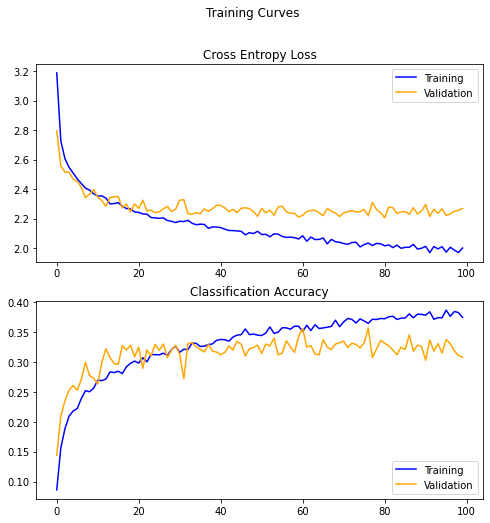

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 2.000
Accuracy on Train Data: 0.402

Test set Evaluation
Loss on Test Data: 2.269
Accuracy on Test Data: 0.339
 --- Trained at: 351.0816168785095 secs --- 


In [ ]:
earlystop_callback = [
                      tf.keras.callbacks.EarlyStopping(patience=2)
]

fcn2 = tf.keras.Sequential()
fcn2.add(tf.keras.layers.Flatten())
fcn2.add(tf.keras.layers.Dense(4096, activation='relu'))
fcn2.add(tf.keras.layers.Dropout(0.5))
fcn2.add(tf.keras.layers.Dense(2048, activation='relu'))
fcn2.add(tf.keras.layers.Dropout(0.5))
fcn2.add(tf.keras.layers.Dense(1024, activation='relu'))
fcn2.add(tf.keras.layers.Dropout(0.5))
fcn2.add(tf.keras.layers.Dense(512, activation='relu'))
fcn2.add(tf.keras.layers.Dense(100, activation='softmax'))

start_time = time.time()
fcn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

fcn2_train = fcn2.fit(x=ds_80_train, validation_data=ds_80_val, epochs=100, verbose = 0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
fcn2.summary()
print("***** MODEL REPORT *****")
model_report(fcn2,fcn2_train, ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Βλέπουμε ότι η εισαγωγή dropout μειώνει σημαντικά το overfitting στο εκπαιδευόμενο δίκτυο, φέρνοντας την απόδοσή του κοντά στην προβλεπόμενη και από τα test data. Φυσικά, δεν αυξήθηκε ιδιαίτερα η ικανότητα γενίκευσης των δικτύων.

Kοινό χαρακτηριστικό των FC δικτύων είναι μεγάλος χρόνος εκπαίδευσης και η γενικά χαμηλή ικανότητα των δικτύων. Επιστρέφουμε στην αρχική μας υπόθεση: ένα απλό FC δίκτυο χρειάζεται σημαντική προεπεξεργασία δεδομένων και εξαγωγή features για να είναι έχει ικανοποιητική επίδοση. Σκοπός μας είναι να αντιμετωπίσουμε αυτή την αδυναμία των FC δικτύων με CNN για την εξαγωγή των features.

## Απλό Συνελικτικό Δίκτυο

Αρχικά φτιάχνουμε ένα αρκετά απλό Συνελικτικό δίκτυο με 4 Layers στο συνελικτικό μέρος του δικτύου και έπειτα 2 layers για την ταξινόμηση των features που παρήχθησαν.

***** MODEL SUMMARY *****
Model: "CNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 

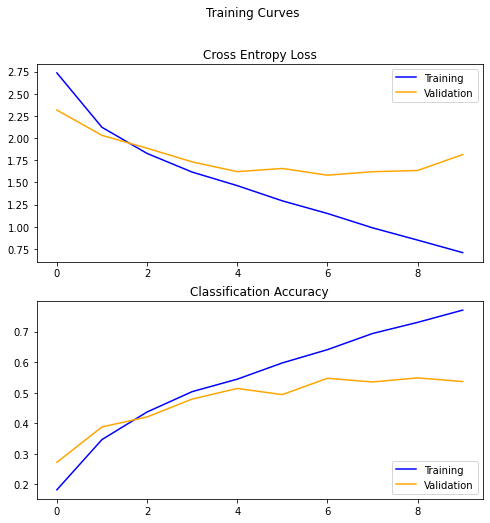

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.612
Accuracy on Train Data: 0.819

Test set Evaluation
Loss on Test Data: 1.764
Accuracy on Test Data: 0.534
 --- Trained at: 40.724265813827515 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1")
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

### Βελτιστοποίηση Αρχιτεκτονικής του Δικτύου

Η αρχική απόδοση του παραπάνω δικτύου είναι 82% accuracy σε training data, 53.4% σε test. Ξαναπροσπαθούμε αρχικά να ανιτμετωπίσουμε το overfitting με την προσθήκη early stopping και dropout επιπέδων μετά από κάθε POOLING layer.

***** MODEL SUMMARY *****
Model: "CNN1_earlystop_dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout

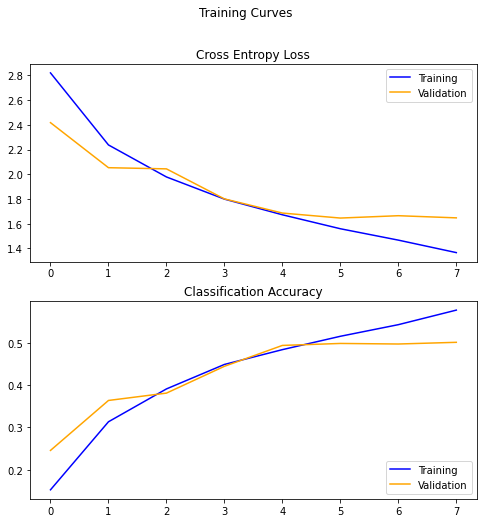

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.263
Accuracy on Train Data: 0.597

Test set Evaluation
Loss on Test Data: 1.592
Accuracy on Test Data: 0.520
 --- Trained at: 27.621158361434937 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1_earlystop_dropout")
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Με την προσθήκη early stopping και dropout βλέπουμε μια σημαντική πτώση της επίδοσης στα test data, ενώ πάλι το validation data σχετικά σταθερό.

Για να περύχουμε περαιτέρω πτώση του overfitting, και να βελτιώσουμε τους χρόνους εκπαίδευσης των δικτύων, εισάγουμς και επίπεδα BatchNormalization.

***** MODEL SUMMARY *****
Model: "CNN1_batchnorm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooli

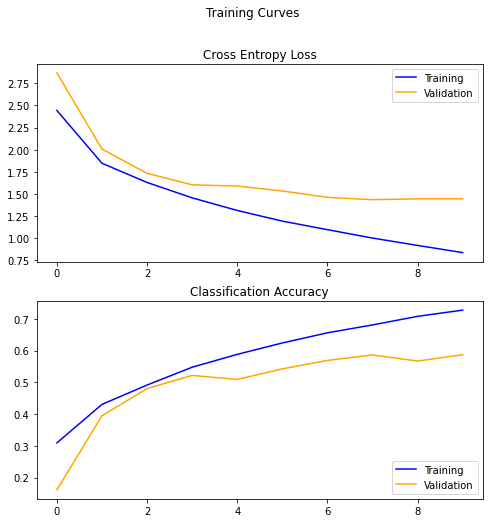

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.658
Accuracy on Train Data: 0.789

Test set Evaluation
Loss on Test Data: 1.309
Accuracy on Test Data: 0.608
 --- Trained at: 38.69846534729004 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1_batchnorm")
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Βλέπουμε σημαντική αύξηση της ικανότητας του δικτύου με χρήση 2 μόλις επιπέδων Batch normalization, ένα πριν την είσοδο του convolutional τμήματος του δικτύου και το άλλο πριν το FC.

Μια τελευταία πιθανή βελτιιστοποίηση στην αρχιτεκτονική του δικτύου είναι το fine tunning κάποιων μικρών παραμέτρων του. Καταρχάς μπορούμε λίγο να αυξήσουμε το ρυθμό του dropout.

***** MODEL SUMMARY *****
Model: "CNN1_finetune"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_22 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_27 (MaxPoolin

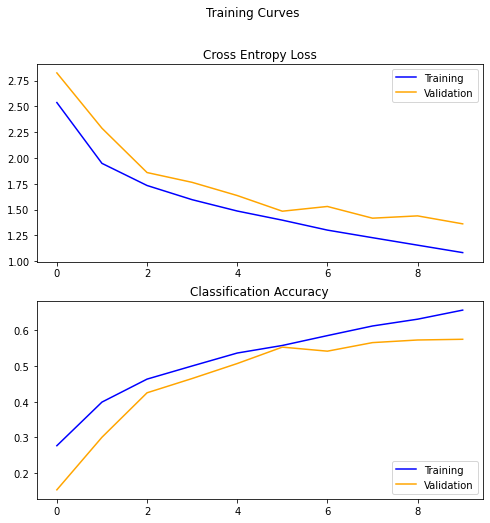

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.827
Accuracy on Train Data: 0.728

Test set Evaluation
Loss on Test Data: 1.288
Accuracy on Test Data: 0.603
 --- Trained at: 36.446311712265015 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1_finetune")
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Dropout(0.3))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn1.add(tf.keras.layers.Dropout(0.3))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Η απόδοση του αρχικού δικτύου έχει αυξήθεί ήδη αρκετά. Στις επόμενες ενότητες θα εξετάσουμε την επίδραση μετασχηματισμών στα δεδομένα του dataset προς δημιουργία περισσότερων παραδειγμάτων εκπαίδευσης. Πριν από αυτό όμως, ας δούμε την επιδραση μερικών υπερπαραμέτρων στην απόδοση του προηγούμενου συστήματος.

### Βελτιστοποίηση Υπερπαραμέτρων

Μέχρι τώρα τα δίκτυα που εκπαιδεύαμε ήταν σε batches των 64 παραδειγμάτων. Αύξηση του batch size αναμένουμε να οδηγήσει σε ταχύτερη εκπαίδευση του διτκύου αλλά μείωση αυτού αναμένεται να οδηγήσει σε πιο ικανά δίκτυα. Η αρχιτεκτονική παραμένει αμετάβλητη.

***** MODEL REPORT *****


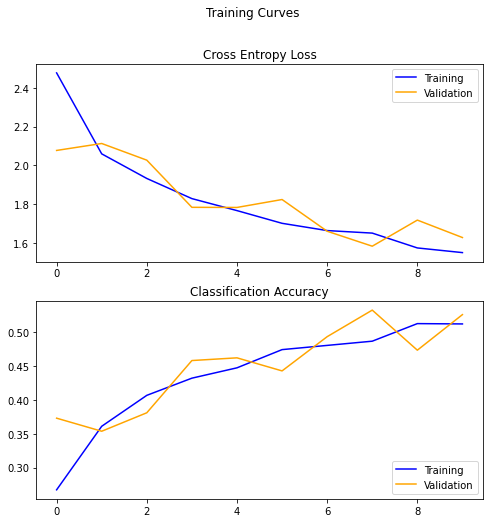

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.076
Accuracy on Train Data: 0.625

Test set Evaluation
Loss on Test Data: 1.626
Accuracy on Test Data: 0.475
 --- Trained at: 52.2256178855896 secs --- 


In [ ]:
ds_80_train_b16 = ds_train.filter(predicate).map(map_function).shuffle(3000).batch(16)
ds_80_test_b16 = ds_test.filter(predicate).map(map_function).shuffle(5000).batch(16)
ds_80_val_b16 = ds_val.filter(predicate).map(map_function).shuffle(5000).batch(16)

cnn2 = tf.keras.Sequential(name = "CNN_b16")
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Dense(256, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train_b16, 
                      validation_data=ds_80_val_b16, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
# print("***** MODEL SUMMARY *****")
# cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train_b16, ds_80_test_b16)
print(f" --- Trained at: {end_time - start_time} secs --- ")

***** MODEL REPORT *****


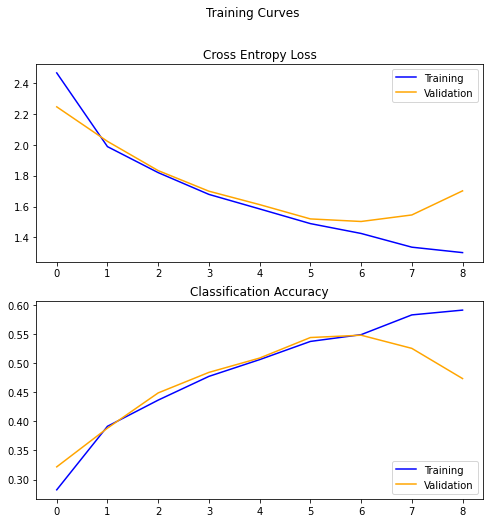

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.190
Accuracy on Train Data: 0.641

Test set Evaluation
Loss on Test Data: 1.666
Accuracy on Test Data: 0.484
 --- Trained at: 42.5095374584198 secs --- 


In [ ]:
ds_80_train_b32 = ds_train.filter(predicate).map(map_function).shuffle(3000).batch(32)
ds_80_test_b32 = ds_test.filter(predicate).map(map_function).shuffle(5000).batch(32)
ds_80_val_b32 = ds_val.filter(predicate).map(map_function).shuffle(5000).batch(32)

cnn2 = tf.keras.Sequential(name = "CNN_b32")
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Dense(256, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train_b32, 
                      validation_data=ds_80_val_b32, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
# print("***** MODEL SUMMARY *****")
# cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train_b32, ds_80_test_b32)
print(f" --- Trained at: {end_time - start_time} secs --- ")

***** MODEL REPORT *****


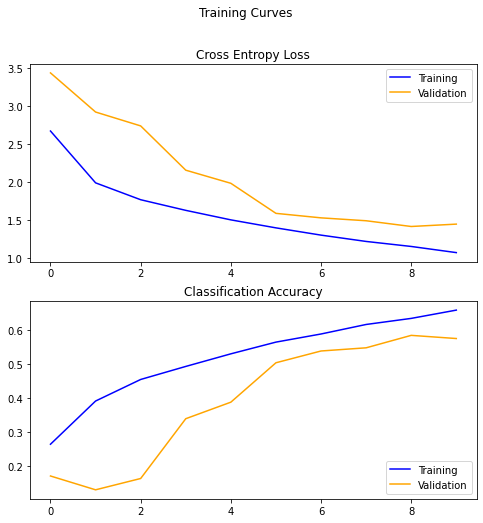

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.960
Accuracy on Train Data: 0.697

Test set Evaluation
Loss on Test Data: 1.453
Accuracy on Test Data: 0.556
 --- Trained at: 34.42668843269348 secs --- 


In [ ]:
ds_80_train_b128 = ds_train.filter(predicate).map(map_function).shuffle(3000).batch(128)
ds_80_test_b128 = ds_test.filter(predicate).map(map_function).shuffle(5000).batch(128)
ds_80_val_b128 = ds_val.filter(predicate).map(map_function).shuffle(5000).batch(128)

cnn2 = tf.keras.Sequential(name = "CNN_b128")
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Dense(256, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train_b128, 
                      validation_data=ds_80_val_b128, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
# print("***** MODEL SUMMARY *****")
# cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train_b128, ds_80_test_b128)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Στην συνέχεια εξετάζουμε την επιλογή optimizer. Δοκιμάζουμε το ίδιο δίκτυο με την χρήση Adam.

***** MODEL REPORT *****


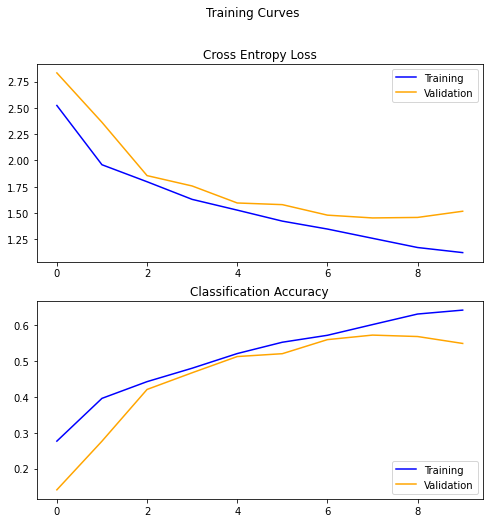

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.952
Accuracy on Train Data: 0.692

Test set Evaluation
Loss on Test Data: 1.499
Accuracy on Test Data: 0.534
 --- Trained at: 35.02823519706726 secs --- 


In [ ]:
cnn2 = tf.keras.Sequential(name = "CNN_adam")
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn2.add(tf.keras.layers.Dropout(0.3))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Dense(256, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=10, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
# print("***** MODEL SUMMARY *****")
# cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

**Σύγκριση ως προς Batch Size**

| Επιλογή<br>Batch Size | Train set<br>- Loss | Train set<br>- Accuracy | Test set<br>- Loss | Test set<br>- Accuracy | Train Time<br>(sec) |
|:---------------------:|:-------------------:|:-----------------------:|:------------------:|:----------------------:|:-------------------:|
|           16          |        1.076        |          0.625          |        1.626       |          0.475         |        52.22        |
|           32          |        1.190        |          0.641          |        1.666       |          0.484         |        42.50        |
|           64          |        0.827        |          0.728          |        1.288       |          0.603         |        36.44        |
|          128          |        0.960        |          0.697          |        1.453       |          0.556         |        34.42         |

**Σύγκριση ως προς Optimizer**

| Optimizer | Test set<br>- Loss | Test set<br>- Accuracy | Train Time<br>(sec) |
|:---------:|--------------------|------------------------|---------------------|
| *Nadam*   | 1.288              | 0.603                  | 36.44               |
| *Adam*    | 1.499              | 0.534                  | 35.02               |

Βλέπουμε ότι γενικά δεν εμφανίζεται σημαντική διαφορά με την μεταβολή των optimizer της αρχιτεκτονικής. Αντιθέτως, η επιλογή Batch Size φαίνεται πως έχει σημαντική επίδραση στην εκπαίδευση των δικτύων. Η καλύτερη επίδοση παρατηρείται για Batch 64 δεδομένων εκπαίδευσης, το οποίο διατηρούμε, μιας και παρέχει ταυτόχρονα και ταχύ χρόνο εκπαίδευσης.

## VGG16 Based Model

Στη συνέχεια δοκιμάζουμε μια πιο περίπλοκη αρχιτεκτονική, βασισμένη στο VGG16. Το δίκτυο ακολουθεί το εξής μοτίβο:
* Συνελικτικό 2D Layer με 3x3 kernel
* Συνελικτικό 2D Layer με 3x3 kernel
* 2x2 Max Pooling

Αυτό επαναλαμβάνεται κάποιες φορές με την κάθε φορά η έξοδος των συνελικτικών Layer να έχει διπλάσιο αριθμό φίλτρων από το προηγούμενο ζεύγος συενλικτικών επιπέδων. Στο δίκτυο εφαρμόζουμε εξ' αρχής early stopping.

***** MODEL SUMMARY *****
Model: "BasicVGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_133 (Conv2D)          (

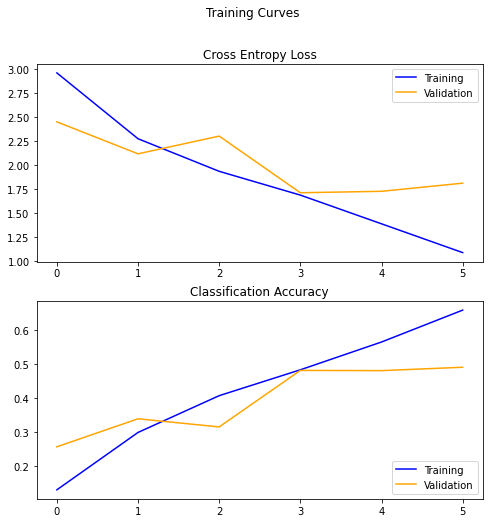

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.728
Accuracy on Train Data: 0.766

Test set Evaluation
Loss on Test Data: 1.820
Accuracy on Test Data: 0.491
 --- Trained at: 29.808063507080078 secs --- 


In [ ]:
#Creating the model
cnn2 = tf.keras.Sequential(name = "BasicVGG16")
#Convolutional Part of Network
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32,32,3)))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

#Classifying Part of Network
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(2048, activation='relu'))
cnn2.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train, 
                      validation_data=ds_80_val, 
                      epochs=15,
                      callbacks = [tensorboard_callback, early_stopping], verbose = 0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train, ds_80_test)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Είναι πάλι φανερό το μεγαλύτερο πρόβλημα που έχουμε αντιμετωπίσει ως τώρα και στα προηγούμενα δίκτυα: το overfitting. Μάλιστα σημειώνουμε ότι αυτό το "αντίγραφο" του VGG16 δεν επιτυγχάνει την ίδια επίδοση με το απλούστερο μοντέλο που κατασκευάσαμε προηγουμένως.

Ο λόγος που ξαναεντοπίζουμε το πρόβλημα είναι πλέον προφανής. Έχουμε 8500 δείγματα εκπαίδευσης, για την ταξινόμηση 80 κλάσεων: ~110 δείγματα ανά κλάση. Αυτά φυσικά είναι ελάχιστα για την "from scratch" εκπαίδευση δικτύου με 6.5 εκατομμύρια παραμέτρους. Αυτή η έλλειψη παραδειγμάτων εκπαίδευσης είναι και ο κύριος λόγος που το δικό μας δίκτυο έχει (ελάχιστα) καλύτερη απόδοση - είναι λιγότερες οι παράμετροι προς εκπαίδευση.

Για να αντιμετωπιστεί αυτό το πρόβλημα, στρεφόμαστε 1) στους μετασχηματισμούς δεδομένων εκπαίδευσης  και 2) στην μεταβολή της αρχιτεκρονικής του VGG16 δικτύου.

## Μετασχηματισμός Δεδομένων

Ξεκινάμε με την εισαγωγή ενός pipeline προεπεξεργασίας των δεδομέων των δικτύων. Ο σκοπός μας είναι να αυξήσουμε "εικονικά" τον αριθμό δεδομένων εκπαίδευσης με χρήση τυχαιων μετασχηματισμών των ήδη υπάρχοντων εικόνων πριν δοθούν στα δίκτυα για ταξινόμηση. Οι μετασχηματισμοί των δεδομένων εκπαίδευσης ειναι  πολλοι και εφαρμόζονται τυχαία, ανά παράδειγμα. Περολαμβάνουν περιστροφές, μετατοπίσεις, ζουμ και ανακλάσεις των εικόνων. Τα δεδομένα testing και validation δεν χρειάζονται μετασχηματισμό, αφού απλά αξιολογούν την επίδοση του δικτύου.

Επιπλέον, με τους μετασχηματισμούς αυτούς, αναμένουμε να δούμε δραματική μείωση του overfitting, ακόμα και των πιο μεγάλων δικτύων.

In [ ]:
data_aug = tf.keras.Sequential([
                                tf.keras.layers.experimental.preprocessing.Resizing(71,71),
                                tf.keras.layers.experimental.preprocessing.RandomTranslation(0.15, 0.15),
                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.25),
                                tf.keras.layers.experimental.preprocessing.RandomContrast(0.25),
                                tf.keras.layers.experimental.preprocessing.RandomFlip(),
                                tf.keras.layers.experimental.preprocessing.RandomZoom((0,0.1))
])

data_res = tf.keras.Sequential([
                                tf.keras.layers.experimental.preprocessing.Resizing(71,71),
])

#augmented_ds_train = filtered_ds_train.cache().map(lambda x,y : (data_aug(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
ds_80_train_rez = ds_80_train.cache().map(lambda x,y : (data_aug(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
ds_80_val_rez = ds_80_val.cache().map(lambda x,y : (data_res(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
ds_80_test_rez = ds_80_test.cache().map(lambda x,y : (data_res(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

Ο μετασχηματισμός δεδομένων δεν εισάγει νέα παραδείγματα στο dataset, παρά τροποποιεί τα ήδη υπάρχοντα με χρήση προεπεξεργαστικού pipeline.

Number of Train Images ~:  8512
Number of Train Images, after Preprocessing ~:  8512


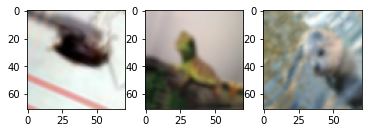

In [ ]:
for i in ds_80_train_rez.take(1):
  plt.subplot(131)
  plt.imshow(i[0][0])
  plt.subplot(132)
  plt.imshow(i[0][1])
  plt.subplot(133)
  plt.imshow(i[0][2])

print("Number of Train Images ~: ", len(list(ds_80_train))*BATCH_SIZE)
print("Number of Train Images, after Preprocessing ~: ", len(list(ds_80_train_rez))*BATCH_SIZE)

Εφαρμόζουμε τους μετασχηματισμούς σε δυο δίκτυα που έχουμε ήδη εξετάσει. 1) Στο απλό δίκτυο "CNN1" με όλες τις βελτιστοποιήσεις που περιγράψαμε, και 2) στο VGG16 δίκτυο, χωρίς προηογύμενη εκπαίδευση και χωρίς βελτιστοποιήσεις.

### Απλό Συνελικτικό Δίκτυο

Epoch 1/30
133/133 [==============================] - 14s 99ms/step - loss: 2.9607 - sparse_categorical_accuracy: 0.1510 - val_loss: 2.6902 - val_sparse_categorical_accuracy: 0.2732
Epoch 2/30
133/133 [==============================] - 13s 97ms/step - loss: 2.3359 - sparse_categorical_accuracy: 0.2817 - val_loss: 2.2565 - val_sparse_categorical_accuracy: 0.3611
Epoch 3/30
133/133 [==============================] - 13s 96ms/step - loss: 2.1515 - sparse_categorical_accuracy: 0.3371 - val_loss: 2.0108 - val_sparse_categorical_accuracy: 0.4011
Epoch 4/30
133/133 [==============================] - 13s 95ms/step - loss: 2.0303 - sparse_categorical_accuracy: 0.3831 - val_loss: 1.9028 - val_sparse_categorical_accuracy: 0.4231
Epoch 5/30
133/133 [==============================] - 13s 95ms/step - loss: 1.9295 - sparse_categorical_accuracy: 0.4018 - val_loss: 1.8563 - val_sparse_categorical_accuracy: 0.4171
Epoch 6/30
133/133 [==============================] - 13s 95ms/step - loss: 1.8601 - spars

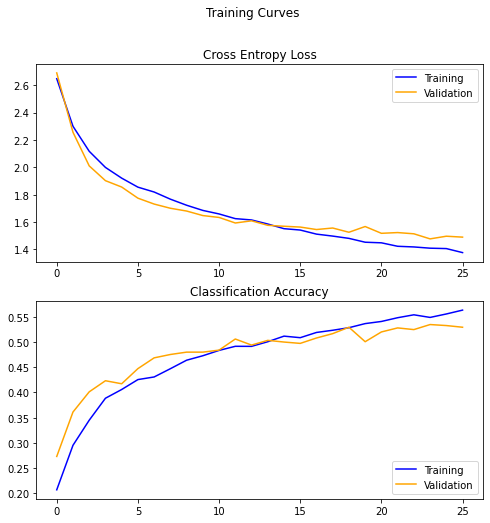

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.399
Accuracy on Train Data: 0.570

Test set Evaluation
Loss on Test Data: 1.443
Accuracy on Test Data: 0.556
 --- Trained at: 344.11303901672363 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1_finetune_augment")
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Dropout(0.3))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn1.add(tf.keras.layers.Dropout(0.3))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1_aug"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train_rez, 
                      validation_data=ds_80_val_rez, 
                      epochs=30, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

### Απλό Συνελικτικό Δίκτυο - χωρίς dropout

Πρώτα παρατηρούμε σημαντικά αυξημένους χρόνους εκπαίδευσης, και την ανάγκη χρήσης περισσότερων εποχών. Οδηγούμαστε όμως σε αρκετά ικανοποιητική απόδοση του δικτύου και δραματική μείωση του overfitting, οπότε ξαναδοκιμάζουμε με αφαίρεση του dropout.

Epoch 1/30
133/133 [==============================] - 14s 99ms/step - loss: 2.9425 - sparse_categorical_accuracy: 0.1616 - val_loss: 2.5577 - val_sparse_categorical_accuracy: 0.2645
Epoch 2/30
133/133 [==============================] - 13s 98ms/step - loss: 2.2665 - sparse_categorical_accuracy: 0.3026 - val_loss: 2.1285 - val_sparse_categorical_accuracy: 0.3638
Epoch 3/30
133/133 [==============================] - 13s 96ms/step - loss: 2.1202 - sparse_categorical_accuracy: 0.3439 - val_loss: 1.9161 - val_sparse_categorical_accuracy: 0.4164
Epoch 4/30
133/133 [==============================] - 13s 96ms/step - loss: 1.9746 - sparse_categorical_accuracy: 0.3891 - val_loss: 1.8204 - val_sparse_categorical_accuracy: 0.4357
Epoch 5/30
133/133 [==============================] - 13s 94ms/step - loss: 1.8692 - sparse_categorical_accuracy: 0.4115 - val_loss: 1.7595 - val_sparse_categorical_accuracy: 0.4564
Epoch 6/30
133/133 [==============================] - 13s 95ms/step - loss: 1.7841 - spars

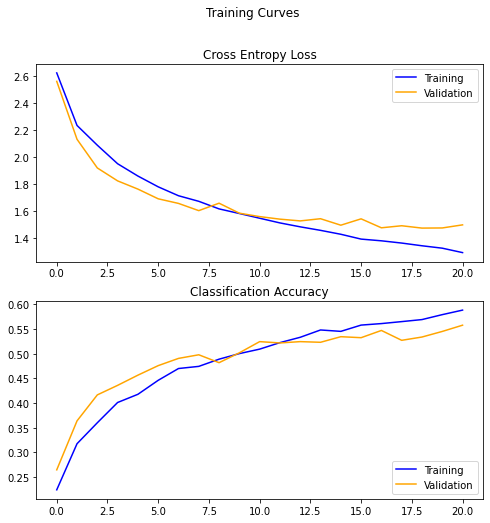

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.279
Accuracy on Train Data: 0.606

Test set Evaluation
Loss on Test Data: 1.378
Accuracy on Test Data: 0.589
 --- Trained at: 275.57823872566223 secs --- 


In [ ]:
cnn1 = tf.keras.Sequential(name = "CNN1_finetune_augment")
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(32,32,3), activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=3, ))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(256, activation='relu'))
cnn1.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn1_aug"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(patience=2)

start_time = time.time()
cnn1.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn1_train = cnn1.fit(x=ds_80_train_rez, 
                      validation_data=ds_80_val_rez, 
                      epochs=30, verbose = 0,
                      callbacks = [tensorboard_callback, earlystop_callback])
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn1.summary()
print("***** MODEL REPORT *****")
model_report(cnn1,cnn1_train,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

### VGG16 Model

Epoch 1/40
133/133 [==============================] - 14s 94ms/step - loss: 3.5246 - sparse_categorical_accuracy: 0.0750 - val_loss: 2.6348 - val_sparse_categorical_accuracy: 0.1686
Epoch 2/40
133/133 [==============================] - 12s 90ms/step - loss: 2.7675 - sparse_categorical_accuracy: 0.1546 - val_loss: 2.4577 - val_sparse_categorical_accuracy: 0.2525
Epoch 3/40
133/133 [==============================] - 12s 89ms/step - loss: 2.4392 - sparse_categorical_accuracy: 0.2606 - val_loss: 2.2519 - val_sparse_categorical_accuracy: 0.3145
Epoch 4/40
133/133 [==============================] - 12s 89ms/step - loss: 2.2576 - sparse_categorical_accuracy: 0.3096 - val_loss: 2.0443 - val_sparse_categorical_accuracy: 0.3664
Epoch 5/40
133/133 [==============================] - 12s 89ms/step - loss: 2.0685 - sparse_categorical_accuracy: 0.3577 - val_loss: 1.9352 - val_sparse_categorical_accuracy: 0.3724
Epoch 6/40
133/133 [==============================] - 12s 89ms/step - loss: 1.9701 - spars

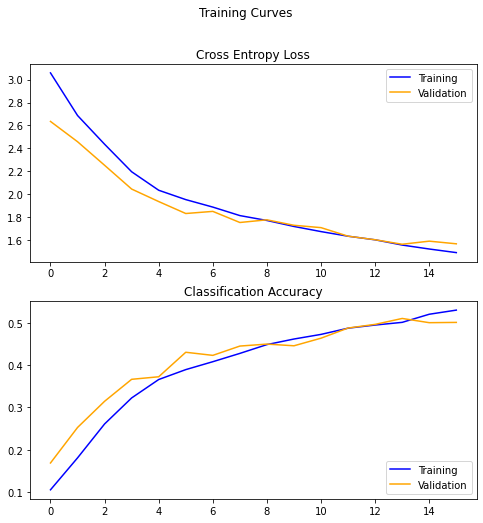

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.472
Accuracy on Train Data: 0.517

Test set Evaluation
Loss on Test Data: 1.509
Accuracy on Test Data: 0.534
 --- Trained at: 217.1457679271698 secs --- 


In [ ]:
#Creating the model
cnn2 = tf.keras.Sequential(name = "BasicVGG16")
#Convolutional Part of Network
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(71,71,3)))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))

#Classifying Part of Network
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(2048, activation='relu'))
cnn2.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train_rez, 
                      validation_data=ds_80_val_rez, 
                      epochs=40,
                      callbacks = [tensorboard_callback, early_stopping], verbose = 0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

### VGG16 Model - με βελτιστοποιήσεις

Τέλος, δικομάζουμε την απόδοση ενός from skratch μοντέλου βασισμένο στο VGG16 αλλά εφαρμόζουμε τις τροποποιήσεις αρχιτεκτονικής που είδαμε προηγουμένως. ΕΞετάζουμε να δούμε εάν και πόσο θα μεταβληθεί η επίδοση σε σχέση μόνο με τους μετασχηματισμούς δεδομένων.



Epoch 1/40
133/133 [==============================] - 14s 94ms/step - loss: 4.0799 - sparse_categorical_accuracy: 0.1101 - val_loss: 2.8534 - val_sparse_categorical_accuracy: 0.2512
Epoch 2/40
133/133 [==============================] - 12s 91ms/step - loss: 2.3796 - sparse_categorical_accuracy: 0.2733 - val_loss: 2.2837 - val_sparse_categorical_accuracy: 0.3438
Epoch 3/40
133/133 [==============================] - 12s 91ms/step - loss: 2.2221 - sparse_categorical_accuracy: 0.3102 - val_loss: 2.1550 - val_sparse_categorical_accuracy: 0.3538
Epoch 4/40
133/133 [==============================] - 12s 91ms/step - loss: 2.1143 - sparse_categorical_accuracy: 0.3424 - val_loss: 2.1058 - val_sparse_categorical_accuracy: 0.3604
Epoch 5/40
133/133 [==============================] - 12s 90ms/step - loss: 2.0338 - sparse_categorical_accuracy: 0.3692 - val_loss: 1.9664 - val_sparse_categorical_accuracy: 0.4171
Epoch 6/40
133/133 [==============================] - 12s 90ms/step - loss: 1.9447 - spars

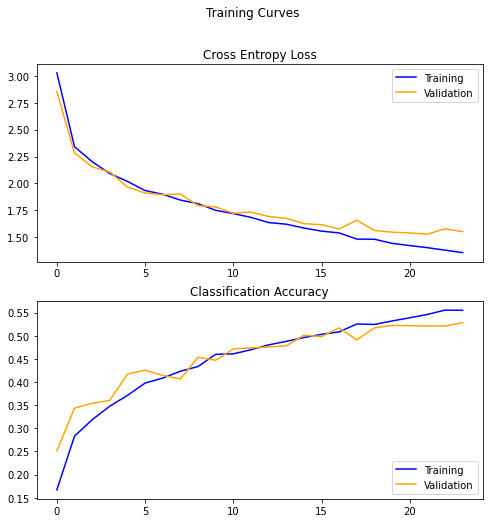

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.414
Accuracy on Train Data: 0.545

Test set Evaluation
Loss on Test Data: 1.372
Accuracy on Test Data: 0.555
 --- Trained at: 329.47862815856934 secs --- 


In [ ]:
#Creating the model
cnn2 = tf.keras.Sequential(name = "BasicVGG16")
cnn2.add(tf.keras.layers.BatchNormalization())
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(71,71,3)))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))
cnn2.add(tf.keras.layers.Dropout(0.2))

cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPooling2D(2))
cnn2.add(tf.keras.layers.Dropout(0.2))

cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_uniform'))
cnn2.add(tf.keras.layers.MaxPool2D(2))
cnn2.add(tf.keras.layers.Dropout(0.2))

#Classifying Part of Network
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(2048, activation='relu'))
cnn2.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn2.add(tf.keras.layers.Dense(100, activation='softmax'))

log_dir = "logs/fit/cnn2"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

start_time = time.time()
cnn2.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
cnn2_train = cnn2.fit(x=ds_80_train_rez, 
                      validation_data=ds_80_val_rez, 
                      epochs=40,
                      callbacks = [tensorboard_callback, early_stopping], verbose = 0)
end_time = time.time()
print("***** MODEL SUMMARY *****")
cnn2.summary()
print("***** MODEL REPORT *****")
model_report(cnn2,cnn2_train,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

# Transfer Learning μοντέλα

Έως τώρα , τα μοντέλα που έχουμε δοκιμάσει έχουν υπάρξει μοντέλο που εκπαιδεύονται από την αρχή, στο τμήμα του dataset που αντιστοιχεί στην ομάδα μας. Σε αυτά τα δίκτυα έχουμε επιτύχει με βήματα τροποποίσης και βελτιστοποίησης, επιδόσεις της τάξης 55 έως 60%. Όμως η εκπαίδευση δικτύων εκ νέου, επιβάλει έναν σημαντικό περιορισμό. Λόγω της υπολογιστικής ισχύος που αποδίδεται στην εκπαίδευση των δικτύων, είναι δύσκολο να προσδιοριστεί ικανοποιητικά μεγάλος αριθμός παραμέτρων. Ως εκ τούτου, η πολυπλοκότητα των δικτύων που εξετάσαμε ήταν περιορισμένη.

To κύριο πλεονέκτημα με την χρήση μοντέλου transfer learning είναι ότι ο κύριο όγκος παραμέτρων του δικτύου είναι ήδη εκπαιδευμένος εκ των προταίρων. Συγκεκριμένα, το convolutional τμήμα του δικτύου, υπεύθυνο για την εξαγωγή των χαρακτηριστικών από τις εικόνες, παραμένει αμετάβλητο. Σκοπός μας είναι να εκπαιδεύσουμε την "κορυφή" των δικτύων, ωστε να πετύουμε καλύτερη αναγνώριση των δικών μας κλάσεων.

 

## VGG19

***** MODEL SUMMARY *****
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 71, 71, 3)         12        
_________________________________________________________________
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              1050624   
_________________________________________________________________
dense_13 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_15 (Dense)            

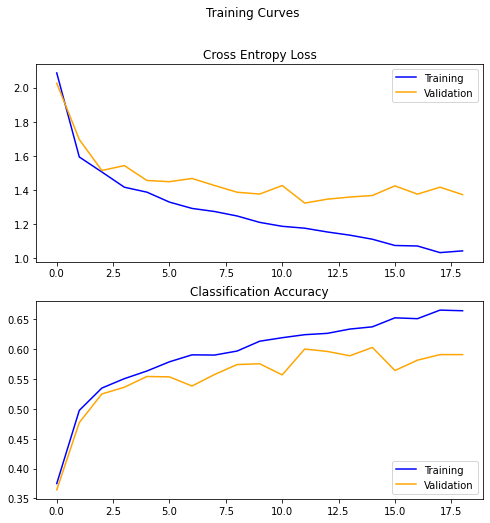

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.011
Accuracy on Train Data: 0.656

Test set Evaluation
Loss on Test Data: 1.259
Accuracy on Test Data: 0.622
 --- Trained at: 289.14865374565125 secs --- 


In [ ]:
vgg19 = tf.keras.applications.VGG19(input_shape=(71,71,3), include_top=False, weights='imagenet')
vgg19.trainable=False

vgg_frozen = tf.keras.Sequential([
    layers.BatchNormalization(),
    vgg19,
    layers.GlobalMaxPool2D(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])
log_dir = "logs/fit/vgg19_frozen_80classes"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)


start_time = time.time()
vgg_frozen.compile(optimizer='nadam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
frozen_base_vgg = vgg_frozen.fit(x=ds_80_train_rez, epochs=70, validation_data=ds_80_val_rez, callbacks = [tensorboard_callback, early_stopping], verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
vgg_frozen.summary()
print("***** MODEL REPORT *****")
model_report(vgg_frozen,frozen_base_vgg,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

### Fine Tuning

Χωρίς ιδαίτερη τροποποίηση έχουμε πετύχει απόδοση 64% στο test set. Φυσικά το μειονέκτημα των αρχιτεκτονικών μεταφοράς μάθησης είναι οτι δεν έχουμε την ίδια ελευθερία στην τροποποίηση του δικτύου. Σε αντιδιαστολή με το προηγούμενο παράδειγμα, δοκιμάζουμε να "ξεπαγώσουμε" την βάση VGG19 του δικτύου, δίνοντας μικρότερο learning rate στον optimizer.

***** MODEL SUMMARY *****
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 71, 71, 3)         12        
_________________________________________________________________
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_7 (Dense)             

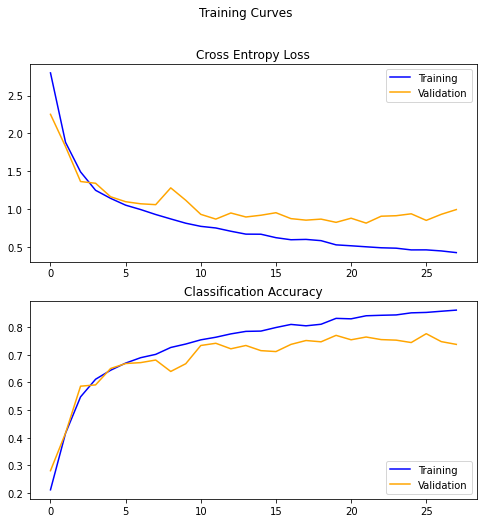

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.379
Accuracy on Train Data: 0.870

Test set Evaluation
Loss on Test Data: 0.916
Accuracy on Test Data: 0.741
 --- Trained at: 518.5233898162842 secs --- 


In [ ]:
vgg19 = tf.keras.applications.VGG19(input_shape=(71,71,3), include_top=False, weights='imagenet')
vgg19.trainable = True
vgg_frozen = tf.keras.Sequential([
    layers.BatchNormalization(),
    vgg19,
    layers.GlobalMaxPool2D(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

log_dir = "logs/fit/vgg19_finetuning_80classes"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

start_time = time.time()
vgg_frozen.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
fine_tuning_vgg =  vgg_frozen.fit(x=ds_80_train_rez, epochs=40,
                                  validation_data=ds_80_val_rez,
                                  callbacks = [tensorboard_callback, early_stopping],
                                  verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
vgg_frozen.summary()
print("***** MODEL REPORT *****")
model_report(vgg_frozen,fine_tuning_vgg,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Φτάνουμε λοιπον σε συνολική επίδοση δικτύου περί το 75%. Αύτη είναι σημαντική βελτίωση συγκριτικά με το 65% του προηγούμενο iteration, και το 55%-60% των "from skratch" δικτύων. Είναι σαφή τα πλεονεκτίματα χρήσης transfer learning μοντέλων. Όχι μόνο μπορούμε να εκμεταλλευτούμε την ήδη υπάρχουσα "γνώση" των δικτύων, ενώ ταυτόχρονα τα προσαρμόζουμε σταδιακά σε συγκεκριμένες κλάσσεις του dataset.

##ResNet

Τέλος, επαναλαμβάνουμε τα ίδια βήματα εκπαίδευσης για αρχιτεκτονική δικτύου βασισμένη στο ResNet. Κατ' αρχήν εισάγουμε μοντέλο transfer learning, τροποποιώντας το αρχιτεκτονικά σύμφωνα με τις προηγούμενες παρατηρήσεις. Αρχικά εκπαιδεύουμε μόνο το FC τμήμα στην αναγνώριση των κλάσσεων και στην συνέχεια "ξεπαγώνουμε" και τις παραμέτρους του συνελικτικού τμηματος ώστε σταδιακά να βελτιστοποιηθεί και η εξαγωγή χαρακτηριστικών από το train set.

234553344/234545216 [==============================] - 3s 0us/step
***** MODEL SUMMARY *****
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 71, 71, 3)         12        
_________________________________________________________________
resnet152v2 (Functional)     (None, 3, 3, 2048)        58331648  
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               524544    
___________________________

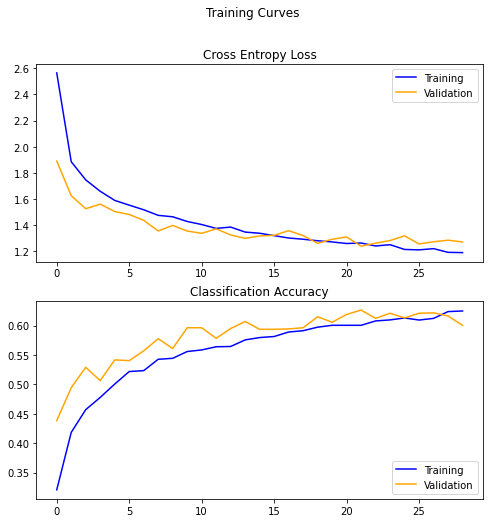

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.165
Accuracy on Train Data: 0.625

Test set Evaluation
Loss on Test Data: 1.380
Accuracy on Test Data: 0.587
 --- Trained at: 807.8471896648407 secs --- 


In [ ]:
resnet1 = tf.keras.applications.ResNet152V2(input_shape=(71,71,3), include_top=False, weights='imagenet')
resnet1.trainable=False

res_frozen = tf.keras.Sequential([
    layers.BatchNormalization(),
    resnet1,
    layers.GlobalMaxPooling2D(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

log_dir = "logs/fit/resnet_frozen"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

start_time = time.time()
res_frozen.compile(optimizer='nadam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
frozen_base_res = res_frozen.fit(x=ds_80_train_rez, epochs=70, 
                                 validation_data=ds_80_val_rez,
                                 callbacks = [tensorboard_callback, early_stopping],
                                 verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
res_frozen.summary()
print("***** MODEL REPORT *****")
model_report(res_frozen,frozen_base_res,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")


Τονίζουμε τον μεγάλο χρόνο εκπαίδευσης του δικτύου, καθώς και τον αριθμό παραμέτρων στο συνελικτικό τμήμα, που προς το παρόν παρέμεινε αμετάβλητο, αλλά στην συνέχεια θα υποστεί fine tuning. Αναμένουμε η εκπαίδευση του δικτύου να χρειαστεί σημαντικά περισσότερο χρόνο από το μοντέλο βασισμένο στο VGG19.

###Fine Tuning

***** MODEL SUMMARY *****
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 71, 71, 3)         12        
_________________________________________________________________
resnet152v2 (Functional)     (None, 3, 3, 2048)        58331648  
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_25 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_26 (Dense)            

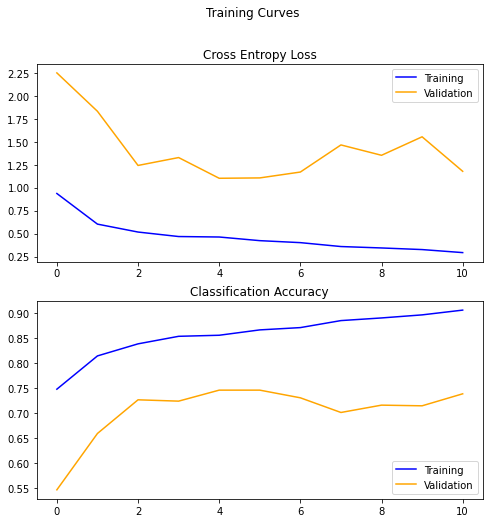

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.507
Accuracy on Train Data: 0.859

Test set Evaluation
Loss on Test Data: 0.964
Accuracy on Test Data: 0.752
 --- Trained at: 464.9092242717743 secs --- 


In [ ]:
resnet1.trainable=True

res_fine = tf.keras.Sequential([
    layers.BatchNormalization(),
    resnet1,
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.2),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

log_dir = "logs/fit/resnet_frozen_fine"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

start_time = time.time()
res_fine.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
res_fine_his = res_fine.fit(x=ds_80_train_rez, epochs=40,
                            validation_data=ds_80_val_rez,
                            callbacks = [tensorboard_callback, early_stopping],
                            verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
res_fine.summary()
print("***** MODEL REPORT *****")
model_report(res_fine,res_fine_his,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

Μια ενδιαφέρουσα παρατήρηση στο παραπάνω μοντέλο είναι πως από την αρχή ακόμα τηςεκπαίδευσης παρατηρείται μεγάλη διαφορά μεταξύ της επίδοσης σε δεδομένα εκπαίδευσης και validation. Υποψιαζόμαστε ότι αυτό οφείλεται στο οτι το FC τμήμα είναι ήδη εκπαιδευμένο στις κλάσεις training.

Δεν θεωρούμε παρ' όλα αυτά πως υποδεικνύει την εμφάνιση overfitting, αφού βλέπουμε σημαντική βελτίωση, τάξης 20% στα validation data. Τελικά το ResNet model πετυχαίνει την ίδιο επίδοση με το finetunned VGG19.

In [ ]:
%tensorboard --logdir logs/fit

##Xception

***** MODEL SUMMARY *****
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_10 (Resizing)       (None, 71, 71, 3)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 71, 71, 3)         12        
_________________________________________________________________
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_9 (Dense)             

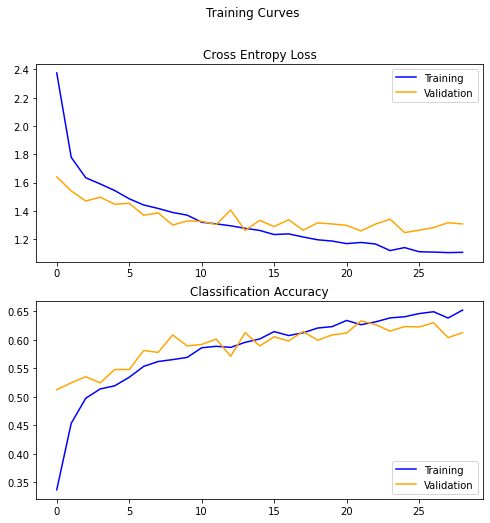

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 1.087
Accuracy on Train Data: 0.647

Test set Evaluation
Loss on Test Data: 1.350
Accuracy on Test Data: 0.613
 --- Trained at: 586.1517541408539 secs --- 


In [ ]:
# data_res = tf.keras.Sequential([
#                                 tf.keras.layers.experimental.preprocessing.Resizing(71,71)
# ])

# ds_80_train_rez = ds_80_train.cache().map(lambda x,y : (data_res(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
# ds_80_test_rez = ds_80_test.cache().map(lambda x,y : (data_res(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
# ds_80_val_rez = ds_80_val.cache().map(lambda x,y : (data_res(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

xce = tf.keras.applications.Xception(input_shape=(71,71,3), include_top=False, weights='imagenet')
xce.trainable=False

xce_model = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(71,71),
    layers.BatchNormalization(),
    xce,
    layers.GlobalMaxPooling2D(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

log_dir = "logs/fit/effnet_frozen"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=7)

start_time = time.time()
xce_model.compile(optimizer='nadam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
frozen_base_xce = xce_model.fit(x=ds_80_train_rez, epochs=50,
                                validation_data=ds_80_val_rez,
                                callbacks = [tensorboard_callback, early_stopping],
                                verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
xce_model.summary()
print("***** MODEL REPORT *****")
model_report(xce_model,frozen_base_xce,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

***** MODEL SUMMARY *****
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_10 (Resizing)       (None, 71, 71, 3)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 71, 71, 3)         12        
_________________________________________________________________
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_9 (Dense)             

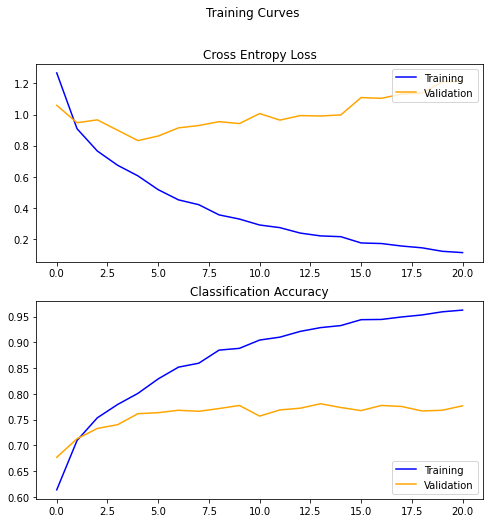

 --- Evaluation Metrics--- 
Train set Evaluation
Loss on Train Data: 0.132
Accuracy on Train Data: 0.958

Test set Evaluation
Loss on Test Data: 1.034
Accuracy on Test Data: 0.803
 --- Trained at: 599.835244178772 secs --- 


In [ ]:
xce.trainable=True
log_dir = "logs/fit/xce_fine"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',
                                                  patience=7)

start_time = time.time()
xce_model.compile(optimizer=tf.optimizers.Nadam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
frozen_base_xce = xce_model.fit(x=ds_80_train_rez, epochs=50,
                                validation_data=ds_80_val_rez,
                                callbacks = [tensorboard_callback, early_stopping],
                                verbose = 0)
end_time = time.time()

print("***** MODEL SUMMARY *****")
xce_model.summary()
print("***** MODEL REPORT *****")
model_report(xce_model,frozen_base_xce,ds_80_train_rez, ds_80_test_rez)
print(f" --- Trained at: {end_time - start_time} secs --- ")

# Συμπεράσματα

Για μια συνολική παρουσίαση των δικτύων δίνουμε τα αποτελέσματα των σημαντικότερων προσομοιώσεων στον παρακάτω πίνακα.

Φυσικά, είναι αντιληπτό ότι οι τεχνικές optimization συνεισφέρουν σημαντικά στην απόδοση των δικτύων. Το πιο ικανό δίκτυο που κατασκευάσαμε βασίζεται στο Xception και έδωση επίδοση 80%.

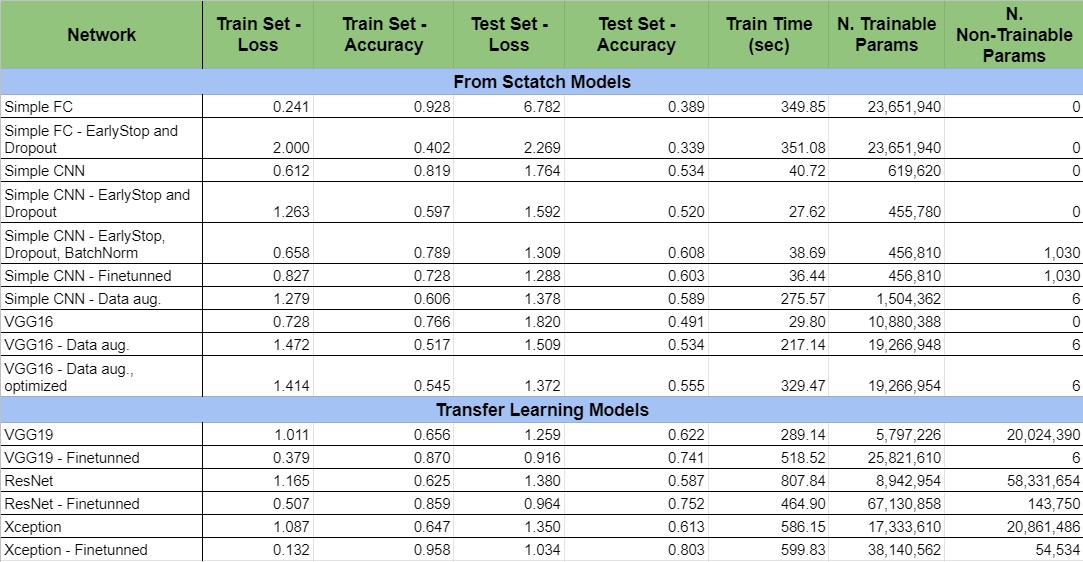

